Question 1: Binary Classification with Logistic Regression<br>

Description:<br>
Use logistic regression to classify the famous Iris dataset into two classes: Versicolor and Not-Versicolor.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to binary classification: Versicolor = 1, Others = 0
y_binary = np.where(y == 1, 1, 0)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Not-Versicolor', 'Versicolor']))

Accuracy: 0.7333333333333333
Confusion Matrix:
 [[29  3]
 [ 9  4]]
Classification Report:
                 precision    recall  f1-score   support

Not-Versicolor       0.76      0.91      0.83        32
    Versicolor       0.57      0.31      0.40        13

      accuracy                           0.73        45
     macro avg       0.67      0.61      0.61        45
  weighted avg       0.71      0.73      0.70        45



Question 2: Multi-Class Classification with Decision Trees<br>

Description:<br>
Classify the Iris dataset using a Decision Tree classifier and visualize the decision tree.

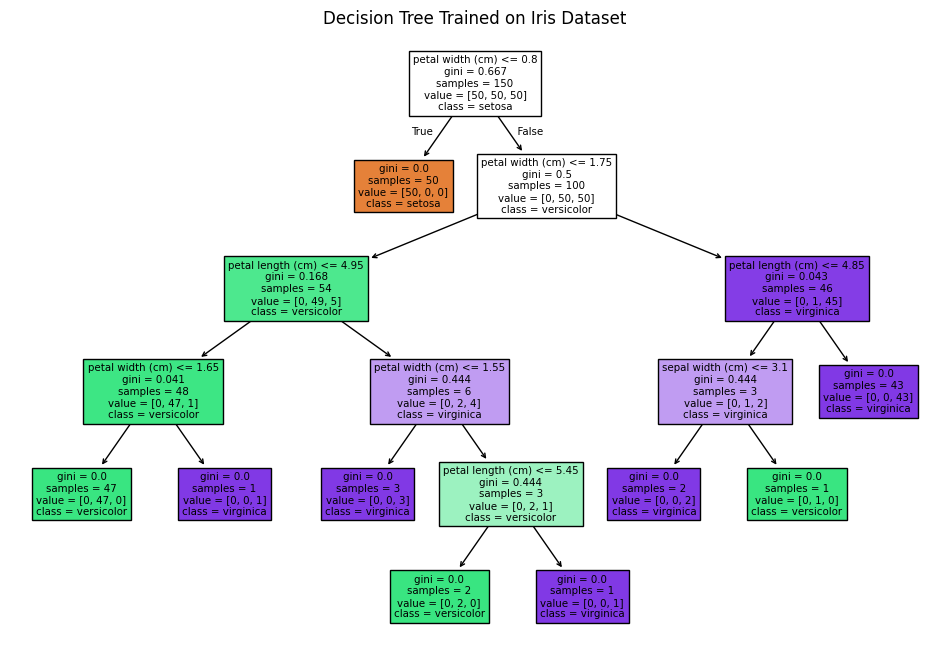

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Trained on Iris Dataset")
plt.show()

Question 3: K-Nearest Neighbors for Binary Classification<br>

Description:<br>
Use K-Nearest Neighbors to classify the Breast Cancer dataset into two classes: Malignant and Benign.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

[[40  3]
 [ 3 68]]
              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Question 4: Evaluate Classification Model using Confusion Matrix<br>

Description:<br>
Evaluate the performance of the K-Nearest Neighbors classifier from Question 3 using a
confusion matrix.

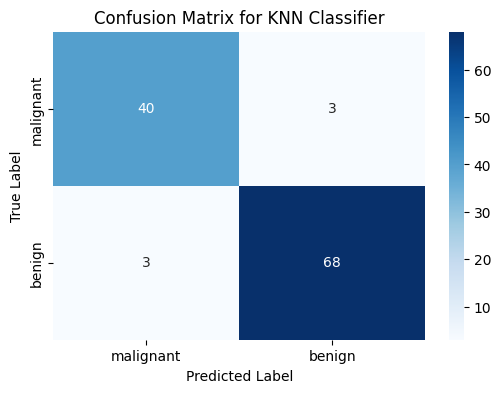

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()


Question 5: SVM Classifier for Multi-Class Classification<br>

Description:<br>
Classify the Wine dataset using Support Vector Machine and check the model's performance.

In [6]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target  # 3 classes

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
svm = SVC(kernel='linear')  # You can also try 'rbf' or 'poly' kernels
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=wine.target_names))

[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      0.93      0.96        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



Question 6: Precision, Recall, and F1-Score<br>

Description:<br>
Calculate precision, recall, and F1-score for the SVM model trained on the Wine dataset.

In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined

# Macro-average (treats all classes equally)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print(f"F1-Score (macro): {f1:.2f}")

Precision (macro): 0.96
Recall (macro): 0.98
F1-Score (macro): 0.97


Question 7: Random Forest for Binary Classification with Feature Importance<br>

Description:<br>
Train a Random Forest classifier on the Breast Cancer dataset and display feature
importances.

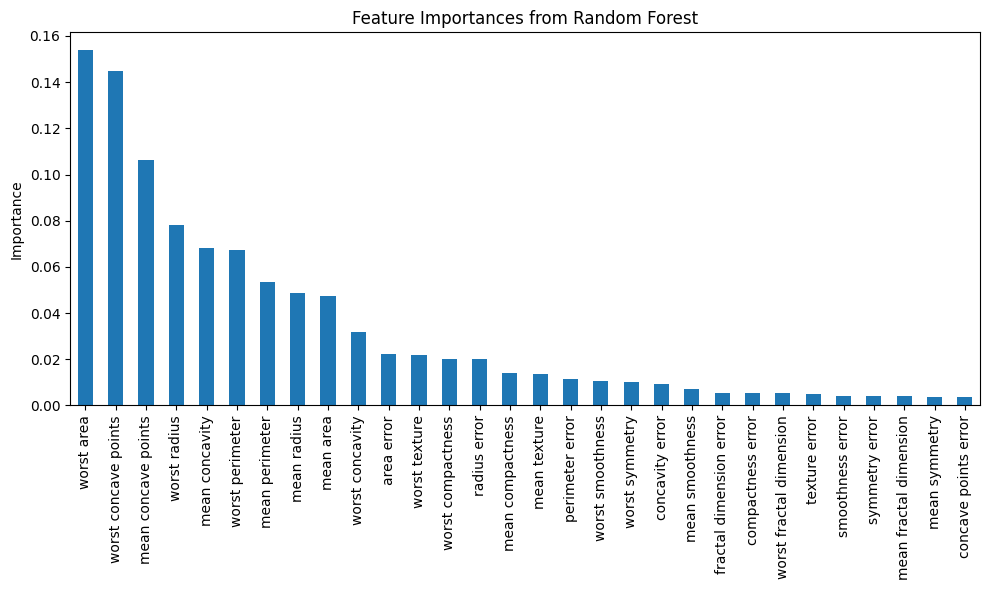

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Create a DataFrame of feature importances
importances = pd.Series(rf.feature_importances_, index=feature_names)
importances_sorted = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='bar')
plt.title("Feature Importances from Random Forest")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

Question 8: ROC-AUC Curve for Binary Classification<br>

Description:<br>
Plot the ROC-AUC curve for the Random Forest model on the Breast Cancer dataset.

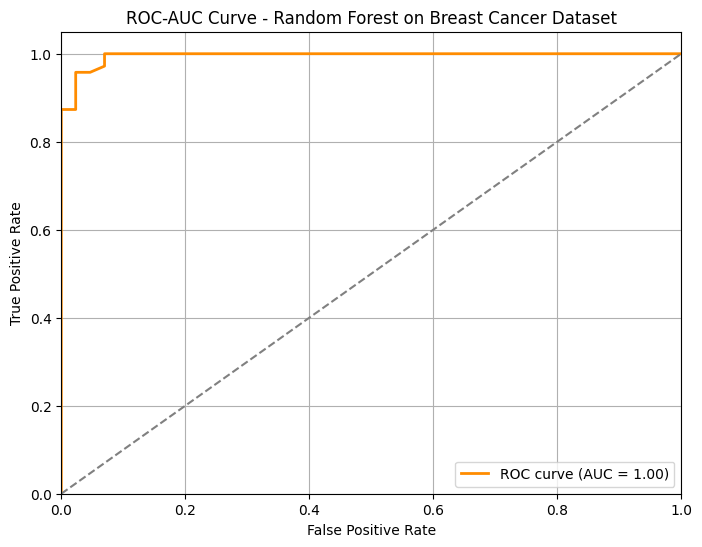

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (for the positive class)
y_scores = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (chance)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Random Forest on Breast Cancer Dataset')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Question 9: Hyperparameter Tuning with Grid Search for SVM Classifier<br>

Description:<br>
Perform hyperparameter tuning on the SVM classifier for the Wine dataset using GridSearchCV.

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Predict with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred, target_names=data.target_names))

Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      0.93      0.96        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



Question 10: Ensemble Learning using Voting Classifier<br>

Description:<br>
Combine different classifiers to form a voting ensemble and classify the Iris dataset.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (optional, but beneficial for some classifiers)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf1 = LogisticRegression()
clf2 = SVC(probability=True)  # probability=True needed for soft voting
clf3 = DecisionTreeClassifier()
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('svc', clf2), ('dt', clf3)],
    voting='soft'  # or 'hard'
)
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

